In [1]:
from matplotlib import pyplot
import numpy as np
import os

import elasticsearch as es
ES_HOST = "localhost"
escon = es.Elasticsearch(ES_HOST, port=9200)
GACRP_HOME=os.environ['GACRP_HOME']

In [2]:
# elasticsearch 接続確認
body = {
            "size":10,
            "query":{
                "match_all":{}
            }
        }
res=escon.search(index='gacrp_index',body=body)
print(res['hits']['total'])
print(res['hits']['hits'][0]['_source']['channelGrouping'])

903653
Organic Search


In [3]:
# esからデータ取得
body = {
    "size":0,
    "aggs":{
        "aggs_channelGrouping":{
            "terms":{
                "field":"channelGrouping.keyword",
                "order":{"_count":"desc"}
            }
        }
    }
}
res=escon.search(index='gacrp_index',body=body)
#print(res['aggregations']['aggs_channelGrouping']['buckets'])
restmp=res['aggregations']['aggs_channelGrouping']['buckets']
#for i in range(len(restmp)):
#    print(restmp[i]['key'],restmp[i]['doc_count'])
          

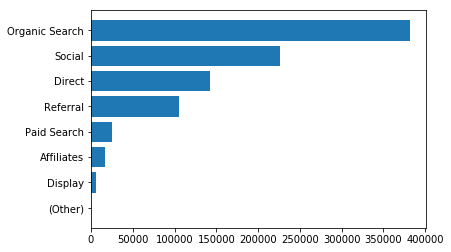

In [4]:
# グラフ化
x=[]
y=[]
ylabel=[]

for i in range(len(restmp)):
    x.append(len(restmp)-i)
    y.append(restmp[i]['doc_count'])
    ylabel.append(restmp[i]['key'])
    
pyplot.barh(x,y,align="center")
pyplot.yticks(x,ylabel)
pyplot.show()    
    

In [5]:
# 横棒グラフの部品化
def showBarGraph(field):
    body = {
        "size":0,
        "aggs":{
            "aggs_field":{
                "terms":{
                    "field":field+".keyword",
                    "order":{"_count":"desc"}
                }
            }
        }
    }
    #print(body)
    
    esRes=escon.search(index='gacrp_index',body=body)
    data=esRes['aggregations']['aggs_field']['buckets']

    graph_x=[]
    graph_y=[]
    graph_ylabel=[]

    for i in range(len(data)):
        graph_x.append(len(data)-i)
        graph_y.append(data[i]['doc_count'])
        graph_ylabel.append(data[i]['key'])
    
    pyplot.barh(graph_x,graph_y,align="center")
    pyplot.yticks(graph_x,graph_ylabel)
    pyplot.title(field)
    pyplot.show()
    
    return

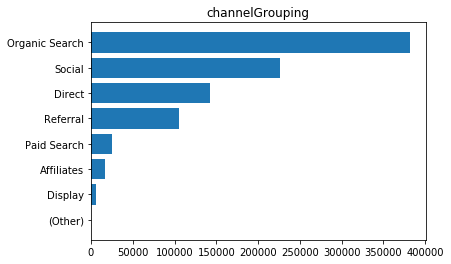

In [6]:
showBarGraph("channelGrouping")

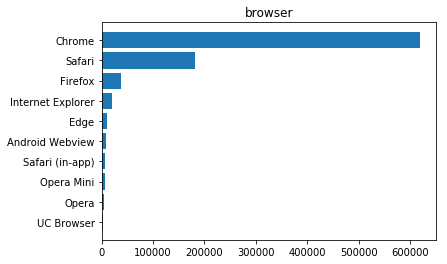

In [7]:
showBarGraph("browser")

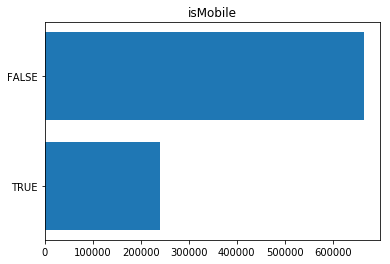

In [8]:
showBarGraph("isMobile")

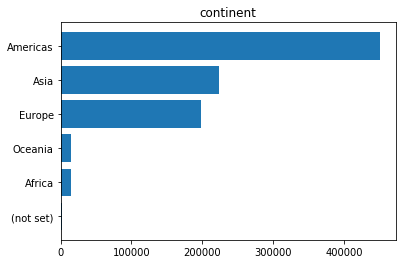

In [9]:
showBarGraph("continent")

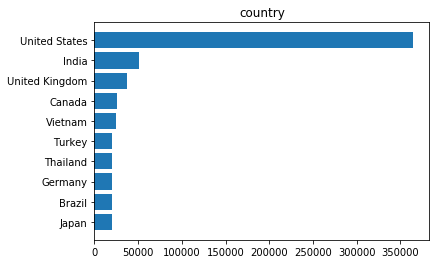

In [10]:
showBarGraph("country")

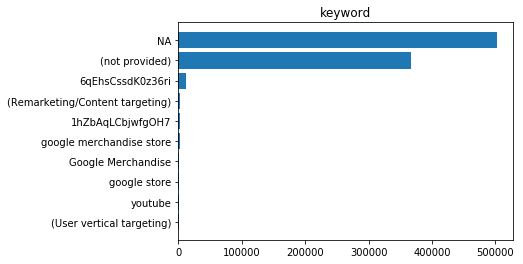

In [11]:
showBarGraph("keyword")

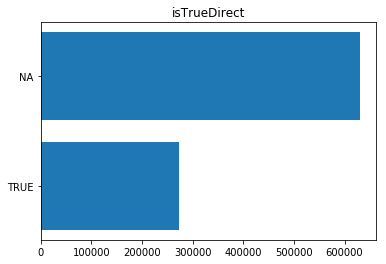

In [12]:
showBarGraph("isTrueDirect")

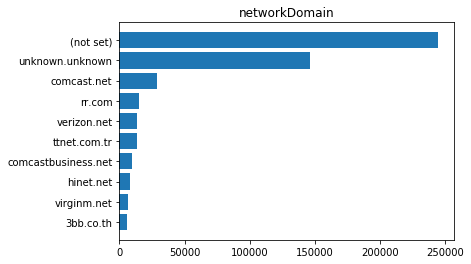

In [13]:
showBarGraph("networkDomain")
#  networkLocation is not available

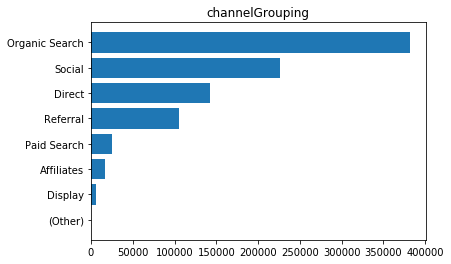

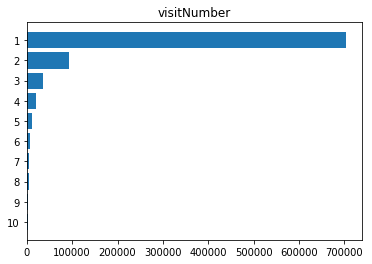

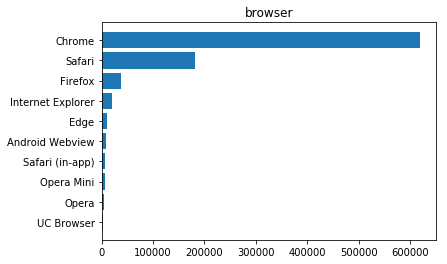

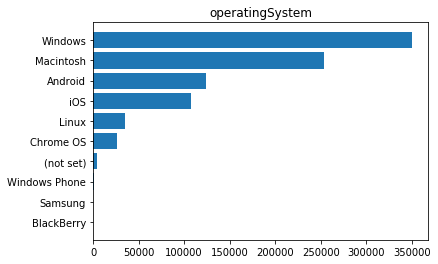

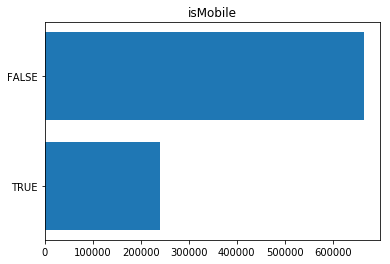

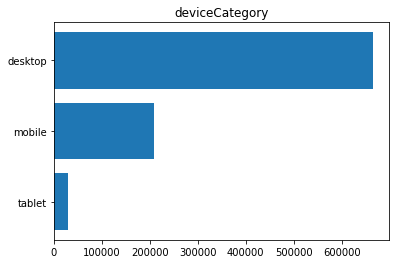

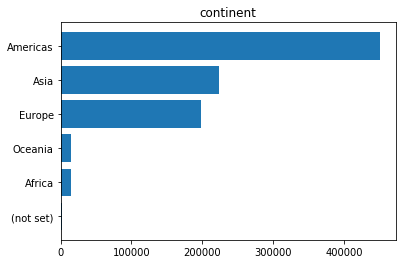

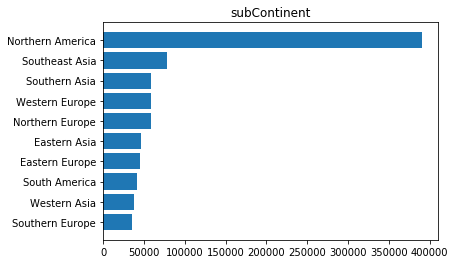

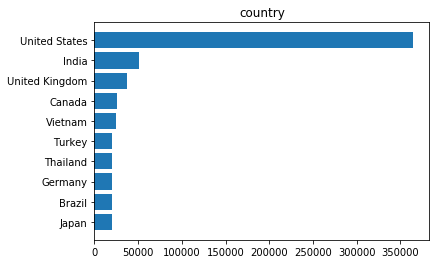

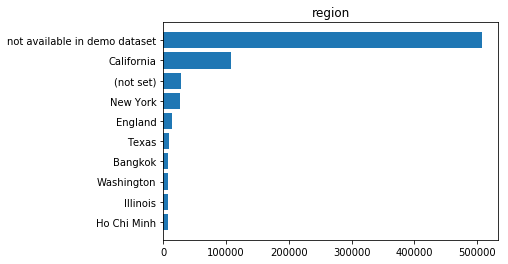

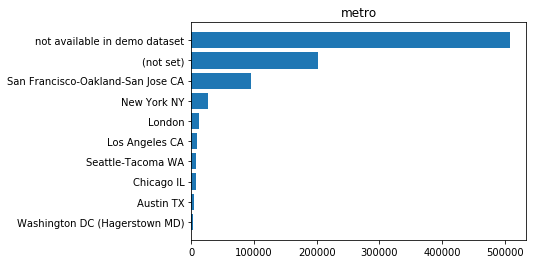

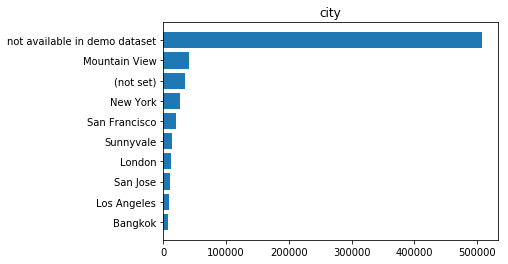

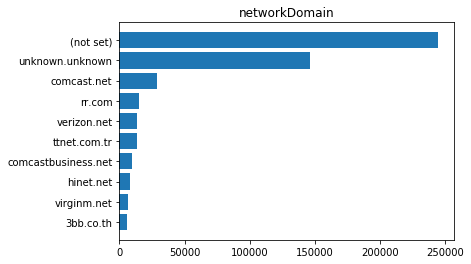

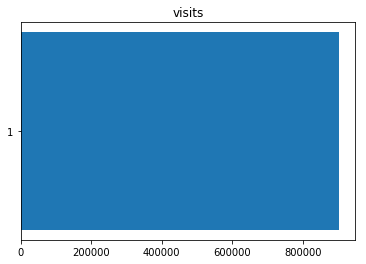

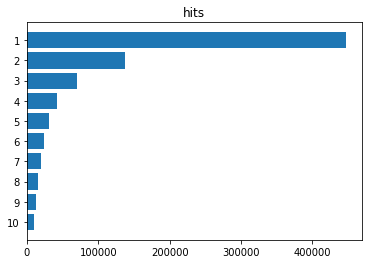

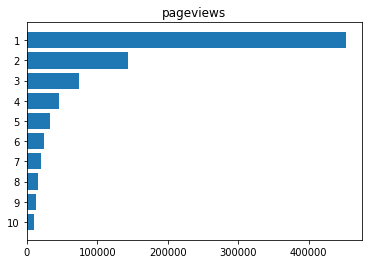

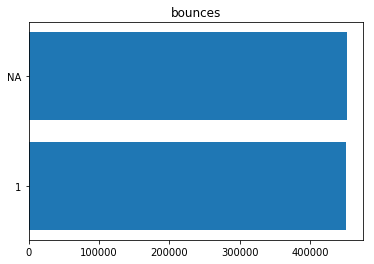

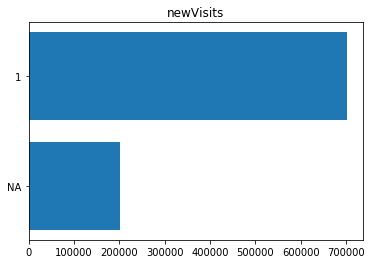

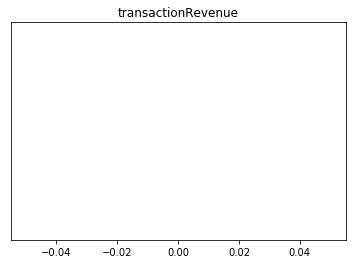

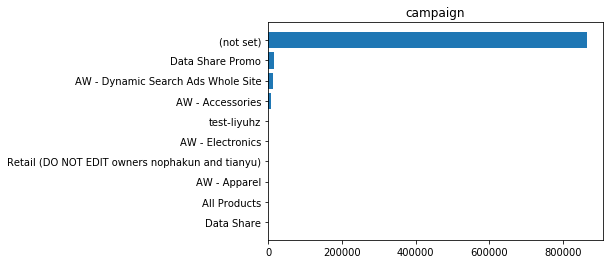

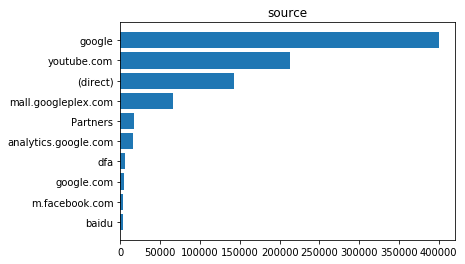

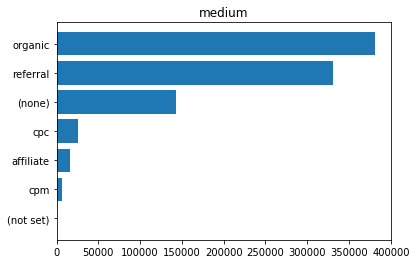

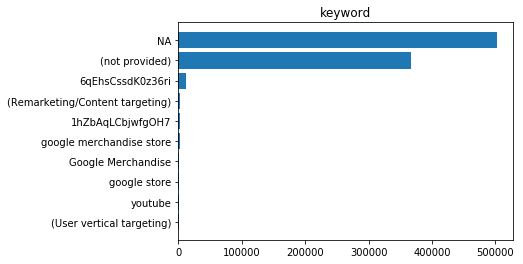

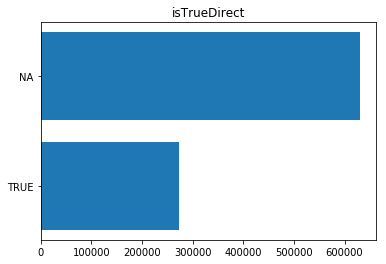

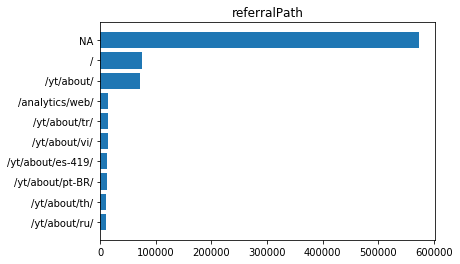

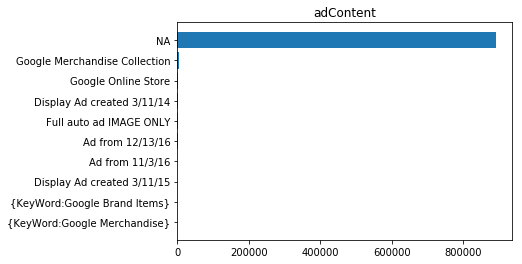

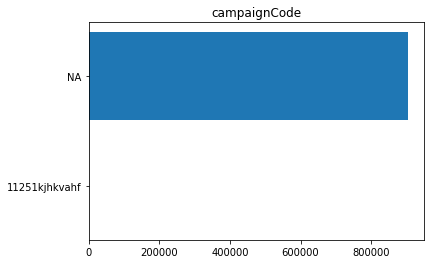

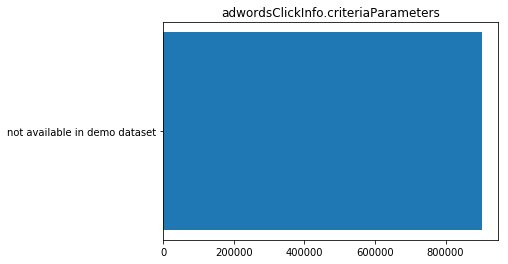

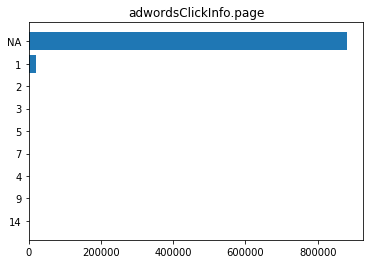

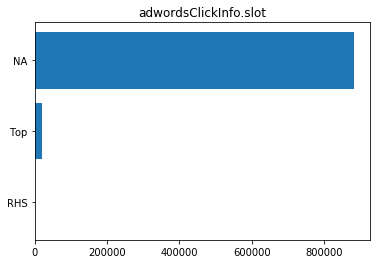

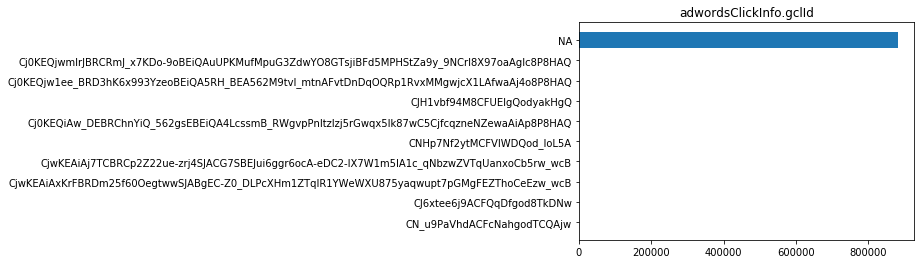

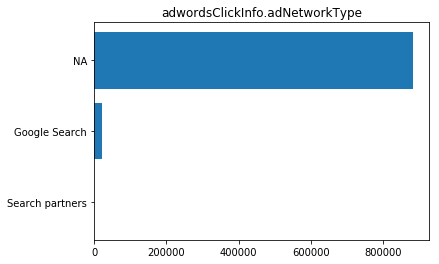

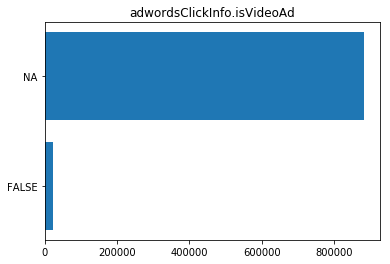

In [14]:
fields=["channelGrouping","visitNumber","browser","operatingSystem","isMobile","deviceCategory","continent","subContinent","country","region","metro","city","networkDomain","visits","hits","pageviews","bounces","newVisits","transactionRevenue","campaign","source","medium","keyword","isTrueDirect","referralPath","adContent","campaignCode","adwordsClickInfo.criteriaParameters","adwordsClickInfo.page","adwordsClickInfo.slot","adwordsClickInfo.gclId","adwordsClickInfo.adNetworkType","adwordsClickInfo.isVideoAd"]
# socialEngagementType,browserVersion,browserSize,"operatingSystemVersion","mobileDeviceBranding",,"mobileDeviceModel","mobileInputSelector","mobileDeviceInfo","mobileDeviceMarketingName","flashVersion","language","screenColors","screenResolution","cityId","latitude","longitude","networkLocation"
for field in fields:
    showBarGraph(field)
    